<a href="https://colab.research.google.com/github/Artem9999999999999999999999/ML/blob/main/KNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [22]:
raw_data = pd.read_csv('classified_data.csv')

In [23]:
raw_data.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [24]:
raw_data = pd.read_csv('classified_data.csv', index_col=0)

In [25]:
raw_data.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(raw_data.drop('TARGET CLASS', axis=1))

In [27]:
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

In [28]:
x, y = scaled_data, raw_data['TARGET CLASS']

In [29]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size=0.3)

In [30]:
model = KNeighborsClassifier(n_neighbors=35)
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=35)

In [31]:
predictions = model.predict(x_test_data)

In [32]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       152
           1       0.91      0.97      0.94       148

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [33]:
print(confusion_matrix(y_test_data, predictions))

[[138  14]
 [  5 143]]


In [34]:
error_rates = []
for i in np.arange(1, 101):
  new_model = KNeighborsClassifier(n_neighbors=i)
  new_model.fit(x_training_data, y_training_data)
  new_predictions = new_model.predict(x_test_data)
  error_rates.append(np.mean(new_predictions != y_test_data))

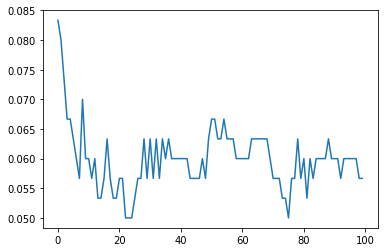

In [43]:
plt.plot(error_rates)
None

# Модели кластеризации методом K-средних

In [54]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [55]:
raw_data = make_blobs(
    n_samples = 200,
    n_features = 2, 
    centers = 4,
    cluster_std = 1.8
)

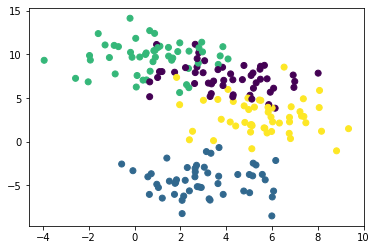

In [56]:
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1])
None

In [57]:
model = KMeans(n_clusters=4)
model.fit(raw_data[0])

KMeans(n_clusters=4)

In [62]:
model.labels_

array([0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 3, 3, 3, 0, 2, 0, 1, 1, 3, 3,
       0, 1, 1, 2, 2, 0, 3, 3, 0, 1, 0, 1, 0, 0, 0, 0, 2, 3, 1, 3, 1, 1,
       1, 2, 3, 1, 2, 1, 0, 1, 2, 1, 3, 2, 3, 3, 2, 1, 1, 2, 2, 0, 0, 0,
       3, 3, 1, 1, 0, 3, 0, 1, 2, 1, 0, 2, 2, 0, 1, 1, 3, 2, 2, 2, 3, 0,
       2, 3, 1, 0, 3, 2, 0, 2, 2, 1, 2, 2, 3, 0, 2, 3, 1, 0, 1, 3, 3, 3,
       0, 2, 2, 3, 3, 3, 3, 0, 3, 1, 0, 3, 1, 3, 0, 2, 0, 1, 3, 2, 2, 2,
       2, 1, 2, 2, 2, 3, 3, 2, 1, 0, 2, 3, 0, 0, 1, 2, 1, 3, 3, 3, 2, 2,
       1, 0, 2, 0, 0, 2, 1, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 0, 2, 2, 3, 2,
       3, 1, 1, 2, 1, 3, 1, 3, 2, 2, 2, 0, 0, 3, 3, 0, 2, 1, 2, 1, 2, 3,
       2, 1], dtype=int32)

In [63]:
model.cluster_centers_

array([[ 5.85676532,  2.16308028],
       [ 4.49216282,  6.63068408],
       [ 0.85259507,  9.63466359],
       [ 3.01856438, -4.53075543]])

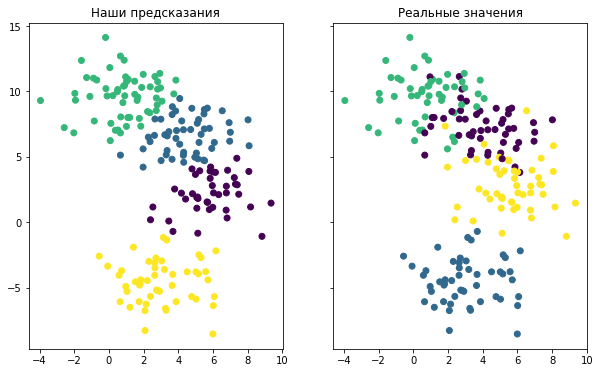

In [64]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
ax1.set_title('Наши предсказания')
ax1.scatter(raw_data[0][:,0], raw_data[0][:,1], c=model.labels_)
ax2.set_title('Реальные значения')
ax2.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1])
None